### Scott Andersen's Unit 12 Homework - NLP

### Due Date: 7/18/2020

In [152]:
import os
import pandas as pd
%matplotlib inline

from newsapi import NewsApiClient
from dotenv import load_dotenv
load_dotenv()

True

In [153]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [154]:
# Read your api key environment variable
# Create a newsapi client
newsapi = NewsApiClient(api_key='My_API_KEY')

In [155]:
# Get the Bitcoin Headlines
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Bitcoin Articles: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Bitcoin Articles: 4443


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Violet Blue',
 'title': "Twitter's Bitcoin hackers had almost limitless access",
 'description': 'On Wednesday, July 15, Twitter was the target of a very public hack attack that’s still sending shockwaves across the internet. In what is a major security breach for the company, a handful of the most-followed Twitter accounts belonging to some of the world’…',
 'url': 'https://www.engadget.com/twitter-bitcoin-scam-social-engineering-hack-access-193040357.html',
 'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-uploaded-images%2F2020-07%2Fca68c900-c85d-11ea-b9df-6238180027a8&client=amp-blogside-v2&signature=9b0fbb183070e467429323ab75f41cbbe1c8dbc3',
 'publishedAt': '2020-07-17T19:30:40Z',
 'content': 'Just hackers burning up 0day like it’s a fire sale\r\nImagine getting the keys to the Twitter kingdom -- access to all the accou

In [156]:
# Get the Ethereum Headlines
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Ethereum Articles: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

Ethereum Articles: 968


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Catherine Shu',
 'title': 'Singapore-based options trading platform Sparrow raises $3.5 million Series A',
 'description': 'Sparrow Exchange, a Bitcoin and Ethereum options trading platform based in Singapore, announced today it has raised $3.5 million in Series A funding. The round was led by HDR Group, the owner of cryptocurrency exchange BitMEX, with participation from Signum C…',
 'url': 'http://techcrunch.com/2020/06/23/singapore-based-options-trading-platform-sparrow-raises-3-5-million-series-a/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/06/GettyImages-1193112376.jpg?w=600',
 'publishedAt': '2020-06-23T08:48:47Z',
 'content': 'Sparrow Exchange, a Bitcoin and Ethereum options trading platform based in Singapore, announced today it has raised $3.5 million in Series A funding.\r\nThe round was led by HDR Group, the owner of cry… [+833 chars]'}

In [157]:
# Create the Bitcoin sentiment scores DataFrame

bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2020-07-17T19:30:40Z,Just hackers burning up 0day like it’s a fire ...,0.0258,0.061,0.059,0.880
1,2020-07-16T20:24:47Z,Most of these accounts tweeted some variant of...,0.0000,0.000,0.000,1.000
2,2020-07-16T21:08:19Z,Reuters had previously reported the FBI would ...,0.0772,0.038,0.000,0.962
3,2020-07-18T04:14:10Z,Our investigation and cooperation with law enf...,0.5994,0.149,0.000,0.851
4,2020-07-16T22:42:57Z,Image copyrightAFP/REUTERSImage caption\r\n Ki...,0.1280,0.049,0.000,0.951


In [158]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"] 
        date = article["publishedAt"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral", ]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2020-06-23T08:48:47Z,"Sparrow Exchange, a Bitcoin and Ethereum optio...",0.0000,0.000,0.0,1.000
1,2020-06-17T19:00:35Z,Editor’s note:Andreessen HorowitzsCrypto Start...,0.0000,0.000,0.0,1.000
2,2020-06-25T04:30:00Z,TL;DR: The Complete Cryptocurrency Investment ...,0.0000,0.000,0.0,1.000
3,2020-06-22T16:23:08Z,"Introducing Web3Torrent\r\nJune 18, 2020\r\nTo...",0.5574,0.137,0.0,0.863
4,2020-07-01T15:00:17Z,"When the inventor of AWS Lambda, Tim Wagner, a...",0.2263,0.053,0.0,0.947


In [159]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.001669,0.054870,0.054510,0.890630
std,0.454831,0.056851,0.071889,0.082629
min,-0.868900,0.000000,0.000000,0.668000
25%,-0.328950,0.000000,0.000000,0.837750
50%,0.000000,0.055000,0.000000,0.910000
75%,0.420600,0.090000,0.088500,0.942500
max,0.817600,0.259000,0.278000,1.000000


In [160]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,96.000000,96.000000,96.000000,96.000000
mean,0.205821,0.073438,0.029458,0.897094
std,0.381084,0.073311,0.048512,0.086872
min,-0.807400,0.000000,0.000000,0.660000
25%,0.000000,0.000000,0.000000,0.836000
50%,0.164500,0.065000,0.000000,0.890500
75%,0.514625,0.134250,0.054000,1.000000
max,0.848100,0.290000,0.249000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [161]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [162]:
# Expand the default stopwords list if necessary
wnl = WordNetLemmatizer() 

stop = stopwords.words('english')
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('chars')
stop.append("''")
stop = set(stop)

In [163]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)
    
    # Convert the words to lowercase
    #words = list(filter(lambda w: w.lower(), words))
    words = [word.lower() for word in words]
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    return tokens

In [164]:
bitcoin_df['tokens'] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-07-17T19:30:40Z,Just hackers burning up 0day like it’s a fire ...,0.0258,0.061,0.059,0.880,"[hacker, burning, 0day, like, ’, fire, sale, i..."
1,2020-07-16T20:24:47Z,Most of these accounts tweeted some variant of...,0.0000,0.000,0.000,1.000,"[account, tweeted, variant, message, someone, ..."
2,2020-07-16T21:08:19Z,Reuters had previously reported the FBI would ...,0.0772,0.038,0.000,0.962,"[reuters, previously, reported, fbi, would, la..."
3,2020-07-18T04:14:10Z,Our investigation and cooperation with law enf...,0.5994,0.149,0.000,0.851,"[investigation, cooperation, law, enforcement,..."
4,2020-07-16T22:42:57Z,Image copyrightAFP/REUTERSImage caption\r\n Ki...,0.1280,0.049,0.000,0.951,"[image, copyrightafp/reutersimage, caption, ki..."


In [165]:
ethereum_df['tokens'] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-06-23T08:48:47Z,"Sparrow Exchange, a Bitcoin and Ethereum optio...",0.0000,0.000,0.0,1.000,"[sparrow, exchange, bitcoin, ethereum, option,..."
1,2020-06-17T19:00:35Z,Editor’s note:Andreessen HorowitzsCrypto Start...,0.0000,0.000,0.0,1.000,"[editor, ’, note, andreessen, horowitzscrypto,..."
2,2020-06-25T04:30:00Z,TL;DR: The Complete Cryptocurrency Investment ...,0.0000,0.000,0.0,1.000,"[tl, dr, complete, cryptocurrency, investment,..."
3,2020-06-22T16:23:08Z,"Introducing Web3Torrent\r\nJune 18, 2020\r\nTo...",0.5574,0.137,0.0,0.863,"[introducing, web3torrent, june, 18, 2020, tod..."
4,2020-07-01T15:00:17Z,"When the inventor of AWS Lambda, Tim Wagner, a...",0.2263,0.053,0.0,0.947,"[inventor, aws, lambda, tim, wagner, former, h..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [166]:
from collections import Counter
from nltk import ngrams

In [167]:
# Generate the Bitcoin N-grams where N=2
#Counter(ngrams([word for token_list in token for word in token_list], 2)).most_common()
N = 2
grams = ngrams(tokenizer(bitcoin_df.text.str.cat()), N)
Counter(grams).most_common(20)

[(('satoshi', 'nakaboto'), 32),
 (('twitter', 'account'), 23),
 (('elon', 'musk'), 18),
 (('robot', 'colleague'), 16),
 (('colleague', 'satoshi'), 16),
 (('nakaboto', 'writes'), 16),
 (('writes', 'bitcoin'), 16),
 (('every', 'fucking'), 16),
 (('fucking', 'day'), 16),
 (('day', 'welcome'), 16),
 (('welcome', 'another'), 16),
 (('another', 'edition'), 16),
 (('edition', 'bitcoin'), 16),
 (('bitcoin', 'today'), 16),
 (('today', 'satoshi'), 16),
 (('nakaboto', 'tell'), 16),
 (('tell', 'whats'), 16),
 (('whats', 'going'), 16),
 (('going', 'bitcoin'), 16),
 (('bitcoin', 'btc'), 15)]

In [168]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(ethereum_df.text.str.cat()), N)
Counter(grams).most_common(20)

[(('bitcoin', 'ethereum'), 8),
 (('day', 'ahead'), 8),
 (('ahead', 'ethereum'), 8),
 (('ethereum', 'would'), 8),
 (('would', 'need'), 8),
 (('support', 'run'), 8),
 (('run', 'first'), 8),
 (('first', 'major'), 8),
 (('major', 'resistance'), 8),
 (('resistance', 'level'), 8),
 (('support', 'broader'), 8),
 (('broader', 'market'), 8),
 (('market', 'would'), 8),
 (('would', 'needed'), 8),
 (('pivot', 'support'), 7),
 (('market', 'daily'), 5),
 (('need', 'avoid'), 5),
 (('avoid', 'fall'), 5),
 (('funding', 'round'), 4),
 (('announced', 'today'), 3)]

In [169]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [170]:
# Get the top 10 words for Bitcoin
btc_tokens = tokenizer(bitcoin_df.text.str.cat())
token_count(btc_tokens, 10)

[('bitcoin', 73),
 ('twitter', 63),
 ('account', 58),
 ('satoshi', 32),
 ('nakaboto', 32),
 ('wednesday', 23),
 ('hack', 21),
 ('musk', 20),
 ('day', 19),
 ('elon', 18)]

In [171]:
# Get the top 10 words for Ethereum
eth_tokens = tokenizer(ethereum_df.text.str.cat())
token_count(eth_tokens, 10)

[('ethereum', 56),
 ('bitcoin', 35),
 ('blockchain', 23),
 ('crypto', 19),
 ('market', 19),
 ('support', 18),
 ('day', 17),
 ('would', 17),
 ('new', 16),
 ('’', 14)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [172]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

lemmatizer = WordNetLemmatizer()

In [173]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

In [174]:
btc_text=' '.join([x for x in bitcoin_df['text']])

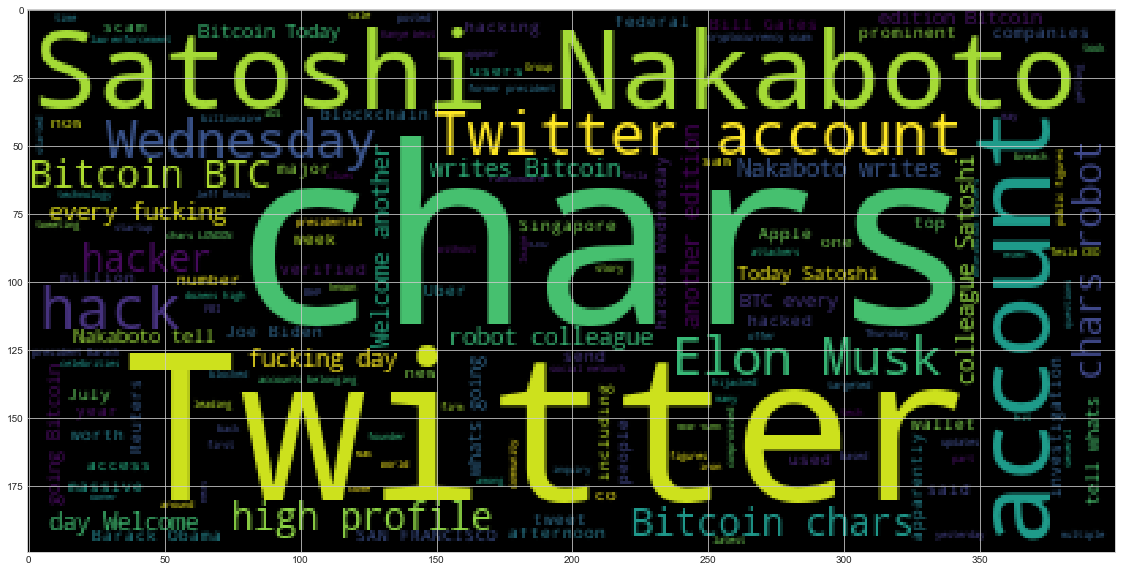

In [175]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(btc_text)
plt.imshow(wc)

In [176]:
ethereum_text=' '.join([x for x in ethereum_df['text']])

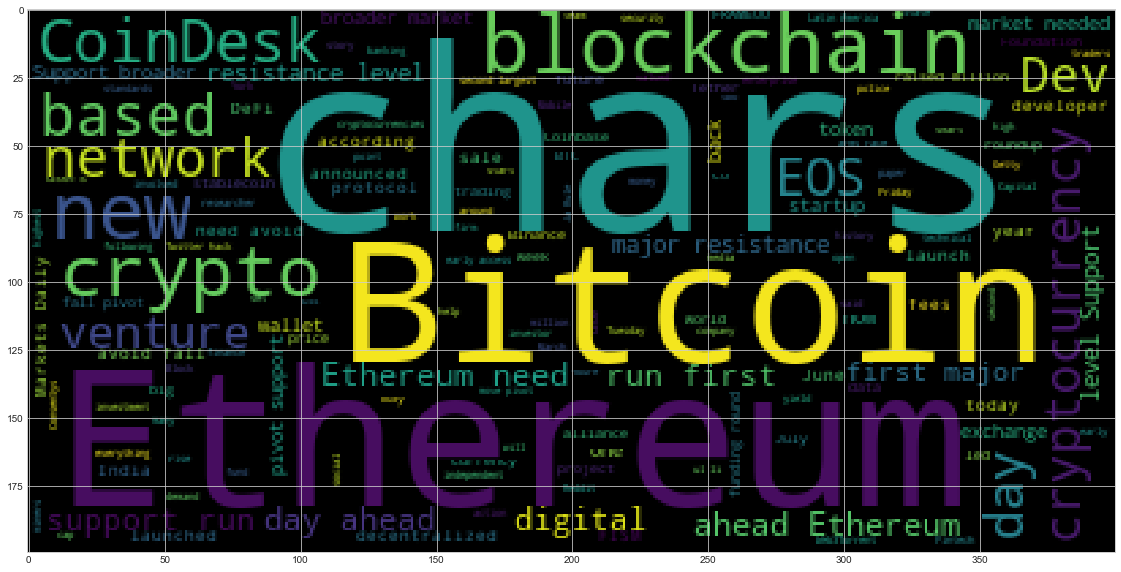

In [177]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(ethereum_text)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [178]:
import spacy
from spacy import displacy

In [179]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [180]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')


## Bitcoin NER

In [181]:
# Concatenate all of the bitcoin text together

all_btc_text = bitcoin_df.text.str.cat()
all_btc_text

'Just hackers burning up 0day like it’s a fire sale\r\nImagine getting the keys to the Twitter kingdom -- access to all the account admin panels in the world. What would you do? You could grab high-valu… [+8860 chars]Most of these accounts tweeted some variant of the same message: If someone were to send Bitcoin to the address specified in the tweets during a 30-minute window, the account owner would return doubl… [+3388 chars]Reuters had previously reported the FBI would launch an investigation into the hack.\r\nThe FBI inquiry is now one of multiple investigations into the incident, which has drawn scrutiny from a number o… [+966 chars]Our investigation and cooperation with law enforcement continues, and we remain committed to sharing any updates here. More to come via @TwitterSupport as our investigation continues.\r\n— Twitter Supp… [+1321 chars]Image copyrightAFP/REUTERSImage caption\r\n Kim Kardashian West, Kanye West, Elon Musk, Bill Gates and Barack Obama were all \'hacked\'\r\

In [182]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER" 

# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [183]:
# List all Entities
entities = [ent.text for ent in doc.ents if ent.label_ in ['GPE', 'ORG']]

In [184]:
entities

['Twitter',
 'Bitcoin',
 'FBI',
 'FBI',
 'Kanye West',
 'Elon Musk',
 'FBI',
 '@rippl',
 'The Social Network',
 'Twitter',
 'Bitcoin',
 'Singapore',
 'HDR Group',
 'McAfee',
 'ec',
 'Francisco',
 'CNN',
 'Elon Musk',
 'Apple',
 'Twitter',
 'Elon Musk',
 'Twitter',
 'Apple',
 'Mac',
 'Mac',
 'Kanye West',
 'Apple',
 'Twitter',
 'Barack',
 'Elon Musk',
 'Reuters',
 'Twitter',
 'Elon Musk',
 'bitcoin',
 'Nvidias',
 'Reuters',
 'Twitter',
 'Reuters',
 'Twitter',
 'Bitcoin',
 'Reuters',
 'Britain',
 'BTC',
 'BTSP',
 'Andreessen HorowitzsCrypto Startup School',
 'U.S.',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin

---

## Ethereum NER

In [185]:
# Concatenate all of the Ethereum text together
all_eth_text = ethereum_df.text.str.cat()
all_eth_text

"Sparrow Exchange, a Bitcoin and Ethereum options trading platform based in Singapore, announced today it has raised $3.5 million in Series A funding.\r\nThe round was led by HDR Group, the owner of cry… [+833 chars]Editor’s note:Andreessen HorowitzsCrypto Startup School brought together 45 participants from around the U.S. and overseas in a seven-week course to learn how to build crypto companies. Andreessen Ho… [+3009 chars]TL;DR: The Complete Cryptocurrency Investment bundle is on sale for £19.21 as of June 25, saving you 94% on list price.\r\nIf we're to believe every plot point from the movie The Social Network, Mark Z… [+2756 chars]Introducing Web3Torrent\r\nJune 18, 2020\r\nToday were excited to share something weve been working on behind the scenes of the\r\nState Channels project: Web3Torrent.\r\nWeb3Torrent is a browser based torre… [+10464 chars]When the inventor of AWS Lambda, Tim Wagner, and the former head of blockchain at AWS, Shruthi Rao, co-found a startup, it’s probab

In [186]:
# Run the NER processor on all of the text
doc2 = nlp(all_eth_text)

# Add a title to the document
doc2.user_data["title"] = "Ethereum NER" 

# Render the visualization
displacy.render(doc2, style='ent', jupyter=True)

In [187]:
# List all Entities
entities2 = [ent.text for ent in doc2.ents if ent.label_ in ['GPE', 'ORG']]

In [188]:
entities2

['Sparrow Exchange',
 'Bitcoin',
 'Singapore',
 'HDR Group',
 'Andreessen HorowitzsCrypto Startup School',
 'U.S.',
 'The Social Network',
 'AWS Lambda',
 'Vendia',
 'Bitcoin',
 'bitcoin',
 'DASH',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Ethereum',
 'Bitcoin',
 'Ethereum',
 'ERC20',
 'Amazon',
 'U.S. Treasury',
 'the Department of Justice',
 'Dune Analytics',
 'Bitcoin',
 'Argent',
 'OpenZeppelin',
 'OpenZeppelin',
 'chars]The Ethereum Foundation',
 'the United Nations Childrens Fund',
 'Indias Supreme Court',
 'Binance',
 'the Internet and Mobile Association of India',
 'DeFi',
 'Los Angeles',
 'Generation Z’s',
 'DeFi',
 'Quantstamp',
 'Twitter',
 'Bitcoin',
 'Russia',
 'ConsenSys',
 'The American Space Shuttle',
 'Community Points',
 'San Francisco',
 'U.S.',
 'Bangalore',
 'India',
 'CoinDesk’s Markets Daily',
 'Bitcoin',
 'Sorare',
 'Hong Kong',
 'Blockchain Bites',
 'bitcoin',
 'CoinDesk’s Markets Daily Bitcoin',
 'COMP',
 'CoinDesks',
 'CoinFlip',
 'Renaissance',
 'Eth